# Exercise 9

## Mashable news stories analysis

### Predicting if a news story is going to be popular


In [76]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/mashable.csv'
train_df = pd.read_csv(url, index_col=0)
train_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [77]:
train_df.shape

(6000, 61)

In [78]:
X = train_df.drop(['url', 'Popular'], axis=1)
y = train_df['Popular']

In [79]:
y.mean()

0.5

In [80]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 9.1

Estimate a Decision Tree Classifier and a Logistic Regresion

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# grow each tree deep
treereg = DecisionTreeClassifier()
treereg.fit(X_train,y_train)
y_pred=treereg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))

print('#################')

from sklearn import datasets, linear_model, metrics

# grow reg log
regr = linear_model.LogisticRegression()
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))



0.544
0.544
#################


C:\Users\JUCORTES\Desktop\UA\ML\python\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.62
0.6047156726768377


# Exercise 9.2

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [82]:
import numpy as np
np.random.seed(123)

#print(X_train.shape[0])

n_samples = X_train.shape[0]
n_B = 300

# create 300 bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
print(enumerate(samples))
samples[0:3]

[array([3582, 3454, 1346, ..., 2409, 3823,  992]),
 array([ 554, 1524, 1802, ..., 1314,  549, 1303]),
 array([3259,  595,  126, ...,  246, 2641,  580])]

### prueba unitaria:

In [83]:
from sklearn.tree import DecisionTreeClassifier

# grow each tree deep
treereg = DecisionTreeClassifier(max_depth=None, random_state=123)

# DataFrame for storing predicted price from each tree
y_pred = pd.DataFrame(index=y_test.index, columns=[list(range(n_B))])

########ajustando un solo arbol de CLASIFICACION con una sola muestra (prueba unitaria), validando sobre los datos de test (OJO)

X_tr = X_train.iloc[samples[0], :]
y_tr = y_train.iloc[samples[0]]
treereg.fit(X_tr, y_tr)
y_pred= treereg.predict(X_test)
print(y_pred)

[1 1 1 ... 1 0 0]


### ajustando los 100 primeros arboles de CLASIFICACION:

In [84]:
# set a seed for reproducibility
np.random.seed(123)

n_samples = X_train.shape[0]
print(n_samples)
n_B = 100

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
len(samples)

4500


100

In [85]:
from sklearn.tree import DecisionTreeClassifier

# grow each tree deep
treereg = DecisionTreeClassifier(max_depth=None, random_state=123)

# DataFrame for storing predicted price from each tree
y_pred = pd.DataFrame(index=y_test.index, columns=[list(range(n_B))])
#print(y_pred)

 #grow one tree for each bootstrap sample and make predictions on testing data
for i, sample in enumerate(samples):
    X_tr = X_train.iloc[sample, :]
    y_tr = y_train.iloc[sample]
    treereg.fit(X_tr, y_tr)
    y_pred[i] = treereg.predict(X_test)
    
print(y_pred[1:3])
    

     0  1  2  3  4  5  6  7  8  9   ... 90 91 92 93 94 95 96 97 98 99
2185  1  1  1  1  0  1  0  1  1  0  ...  1  0  1  1  0  1  1  1  1  1
2520  1  0  0  0  1  1  1  1  0  0  ...  1  1  1  0  1  0  1  0  1  1

[2 rows x 100 columns]


### E92

In [86]:
# set a seed for reproducibility
np.random.seed(123)

n_samples = X_train.shape[0]
print(n_samples)
n_B = 300

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
len(samples)

4500


300

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model, metrics
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

# grow each tree deep
#treereg = DecisionTreeClassifier(max_depth=None, random_state=123)
#treereg2 = DecisionTreeClassifier(max_depth=2, random_state=123)
#regr = linear_model.LogisticRegression(solver='lbfgs',random_state=123)
mods = {}

# DataFrame for storing predicted price from each tree
y_pred = pd.DataFrame(index=y_test.index, columns=[list(range(n_B))])
#print(y_pred)

#grow one tree for each bootstrap sample and make predictions on testing data
for i, sample in enumerate(samples):
    
    #print(i)
    
    if (i<100): #donde la expresion es verdadera
        #codigo_a_ejecutar
        X_tr = X_train.iloc[sample, :]
        y_tr = y_train.iloc[sample]
        mods[i]=DecisionTreeClassifier(max_depth=None, random_state=123)        
        mods[i].fit(X_tr, y_tr)
        y_pred[i] = mods[i].predict(X_test)
        
        
    if (i>99 & i<200): #donde la expresion es verdadera
            #codigo_a_ejecutar
            X_tr = X_train.iloc[sample, :]
            y_tr = y_train.iloc[sample]
            mods[i]=DecisionTreeClassifier(max_depth=2, random_state=123)
            mods[i].fit(X_tr, y_tr)
            y_pred[i] = mods[i].predict(X_test)
        
    if (i>199): #donde la expresion es verdadera
            #codigo_a_ejecutar
            

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            fxn()
            
            X_tr = X_train.iloc[sample, :]
            y_tr = y_train.iloc[sample]
            mods[i]=linear_model.LogisticRegression(solver='lbfgs',random_state=123)
            mods[i].fit(X_tr, y_tr)
            y_pred[i] = mods[i].predict(X_test)

#if expresion: #donde la expresion es verdadera
    #codigo_a_ejecutar

In [93]:
print(y_pred[[1,100,200]].iloc[0:3,:]) 
print(len(y_pred))

     1   100 200
1483   1   1   1
2185   1   1   0
2520   0   1   1
1500


# Exercise 9.3

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [94]:
y_pred1 = (y_pred.sum(axis=1) >= (n_B / 2)).astype(np.int)
print(y_pred1.head())

from sklearn import metrics
print(metrics.f1_score(y_pred1, y_test))
metrics.accuracy_score(y_pred1, y_test)

1483    1
2185    1
2520    1
3721    1
3727    0
dtype: int32
0.6318644067796609


0.638

# Exercise 9.4

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [95]:
######### a)

y_pred.head()
print(y_pred.shape[0])
print((y_pred.sum(axis=1)/y_pred.shape[0])[0:4])

########################### b)

varpr=np.arange(0.1, 1, 0.01)
f1sc = pd.Series()

for i in varpr:    
    y_pred1 = (y_pred.sum(axis=1)/n_B >= i).astype(np.int)
    f1sc[i]=metrics.f1_score(y_pred1, y_test)

print(f1sc[varpr[0:4]])
len(f1sc)
f1sc[f1sc==max(f1sc)]

#valid=pd.DataFrame(pd.concat([y_pred1,y_test],ignore_index=True,axis=1))
#valid.rename(columns={0:'pred',1:'true'}, inplace=True)
#valid['resta']=valid['pred']-valid['true']
#valid.loc[valid['resta']==0].sum()
#valid.shape[0]

#########a)
#y_pred.head()
#print(y_pred.shape[0])
#print((y_pred.sum(axis=1)/y_pred.shape[0])[0:4])

#########b)

#varpr=np.arange(0.1, 1.1, 0.1)
#print(varpr)
#print(y_pred.sum(axis=1)/n_B)
#print(y_pred1.head())

#f1sc = pd.Series()
#for i in varpr:
    
#    y_pred1 = (y_pred.sum(axis=1)/n_B >= i).astype(np.int)

#    from sklearn import metrics
#    f1sc[i]=metrics.f1_score(y_pred1, y_test)
#print(f1sc)
#len(f1sc)


1500
1483    0.198000
2185    0.166667
2520    0.194000
3721    0.197333
dtype: float64
0.10    0.672535
0.11    0.672189
0.12    0.673797
0.13    0.673008
dtype: float64


0.12    0.673797
dtype: float64

# Exercise 9.5

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [96]:
samples_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [97]:
errors = np.zeros(n_B)

for i in range(n_B):
    y_pred_ = mods[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree')

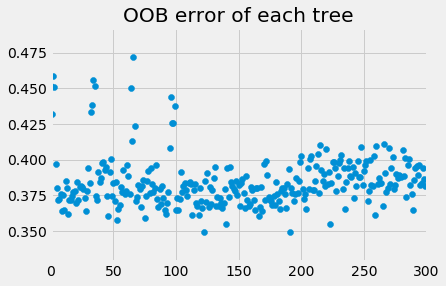

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_B), errors)
plt.xlim([0, n_B])
plt.title('OOB error of each tree')

In [100]:
alpha = (1 - errors) / (1 - errors).sum()

In [102]:
weighted_sum_1 = ((y_pred) * alpha).sum(axis=1)

In [107]:
weighted_sum_1.head(20)

1483    0.991122
2185    0.836489
2520    0.972921
3721    0.987964
3727    0.012849
4524    0.969284
234     0.016253
4735    0.036301
5839    0.225412
2939    0.978230
3053    0.978725
867     0.981781
276     0.976104
5798    0.009065
3512    0.994016
5789    0.011775
3198    0.972554
5908    0.990909
5718    0.030910
2687    0.028863
dtype: float64

In [116]:
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6318644067796609, 0.638)

# Exercise 9.6

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [128]:
######### a)
print(y_pred.sum()/y_pred.shape[0])

########################### b)

varpr=np.arange(0.1, 1, 0.01)
f1sc = pd.Series()

for i in varpr:    
    y_pred1 = (weighted_sum_1 >= i).astype(np.int)
    f1sc[i]=metrics.f1_score(y_pred1, y_test)

print(f1sc[varpr[0:4]])
len(f1sc)
f1sc[f1sc==max(f1sc)]

0.47933333333333333
0.10    0.670200
0.11    0.672199
0.12    0.673797
0.13    0.672619
dtype: float64


0.12    0.673797
dtype: float64

# Exercise 9.7

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [132]:
X_train_2 = pd.DataFrame(index=X_train.index, columns=list(range(n_B)))

for i in range(n_B):
    X_train_2[i] = mods[i].predict(X_train)

In [148]:
X_train_2.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
2420,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1225,1,0,1,0,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
324,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5863,1,1,1,1,0,0,1,1,1,1,...,1,0,1,1,0,1,1,0,0,1
86,0,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [149]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(cv = 5 ,max_iter=1000)
lr.fit(X_train_2, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

### La diferencia de la calidad del ajuste entre una regresion lineal y/o un arbol de regresion, respecto a un ensamble (con voto mayoritario) y las condiciones dadas en el ejericicio, no amerita el costo computacional del ensamble. Sin embargo, cuando se ensambla mediante weighted voting, y se selecciona el umbral que maximiza el fscore, se observa una mejoria significativa en el ajuste.